Import packages


In [97]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pandas.plotting import scatter_matrix


In [98]:
#Load the dataset
#Check data distribution

wine_df=pd.read_csv("winequality-red.csv",sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [99]:
#Information about the data columns
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [100]:
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


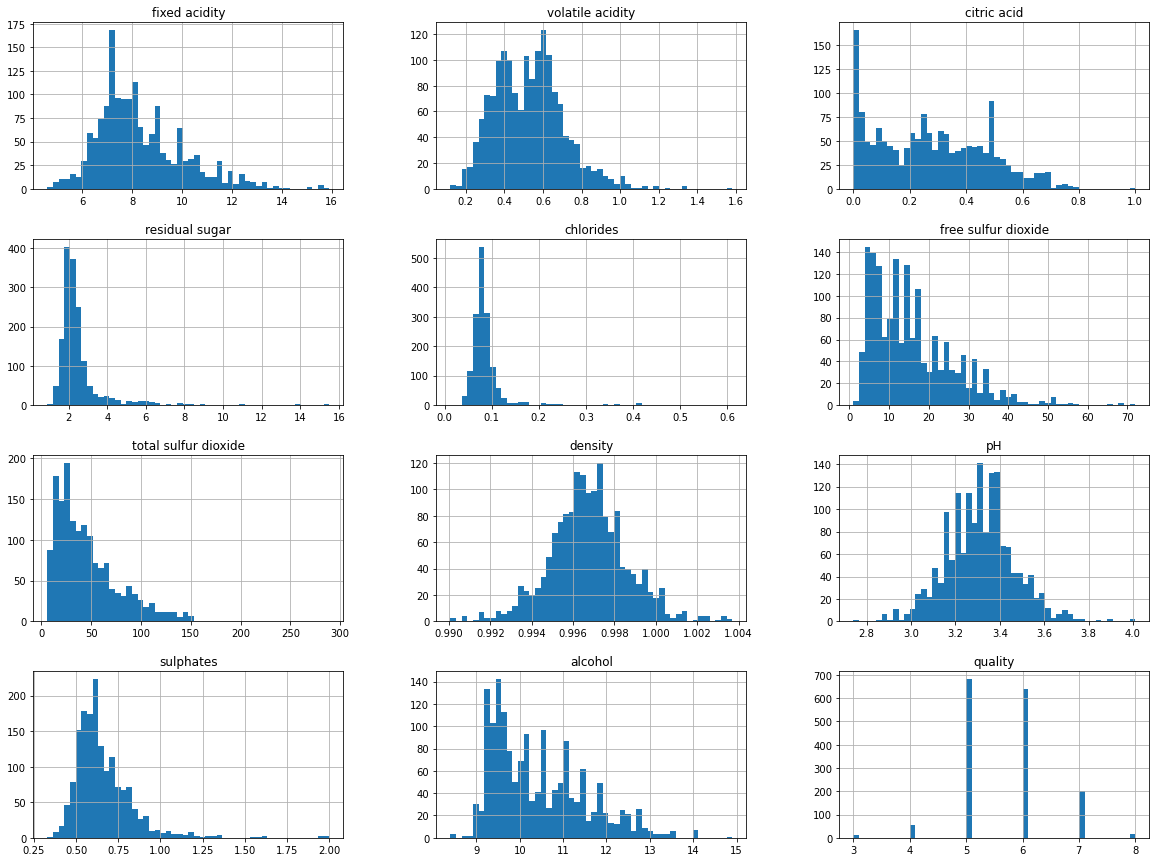

In [101]:
#Plotting the charts
%matplotlib inline  
import matplotlib.pyplot as plt
wine_df.hist(bins=50, figsize=(20,15))
plt.show()

In [102]:
#Getting the correlation matrix
corr_matrix=wine_df.corr()
corr_matrix['alcohol'].sort_values(ascending=False)

alcohol                 1.000000
quality                 0.476166
pH                      0.205633
citric acid             0.109903
sulphates               0.093595
residual sugar          0.042075
fixed acidity          -0.061668
free sulfur dioxide    -0.069408
volatile acidity       -0.202288
total sulfur dioxide   -0.205654
chlorides              -0.221141
density                -0.496180
Name: alcohol, dtype: float64

array([[<AxesSubplot:xlabel='alcohol', ylabel='alcohol'>,
        <AxesSubplot:xlabel='pH', ylabel='alcohol'>],
       [<AxesSubplot:xlabel='alcohol', ylabel='pH'>,
        <AxesSubplot:xlabel='pH', ylabel='pH'>]], dtype=object)

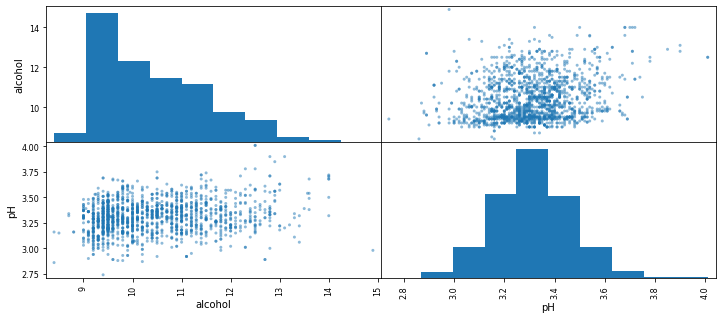

In [103]:
#plotting scatter plot of highly correlating features
attributes= ['alcohol','pH']
scatter_matrix(wine_df[attributes],figsize=(12,5))

In [104]:
#Making binary classification for the target variable
#Bad=0 and good=1
def quality_label(row):
    if row.quality > 6.5:
        return 1
    else:
        return 0

wine_df['quality_label']=wine_df.apply(quality_label,axis=1)
wine_df['quality_label'].value_counts() 



0    1382
1     217
Name: quality_label, dtype: int64

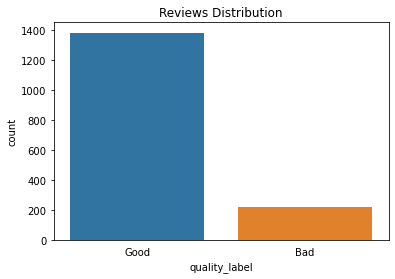

In [105]:
ax = sns.countplot(data=wine_df, x='quality_label')
ax.set(xticklabels=['Good','Bad'], title="Reviews Distribution")
ax.tick_params(bottom=False)

In [106]:
#Separating the dataset as feature and target variable
X=wine_df.drop(['quality_label','quality'],axis= 1)
y=wine_df['quality_label']

In [107]:
#Splitting the train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [108]:
#Applying standard scaling
sc = StandardScaler()

In [109]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [110]:
#Random Forest Classifier and its classification report
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test, pred_rfc))



              precision    recall  f1-score   support

           0       0.90      0.97      0.94       273
           1       0.73      0.40      0.52        47

    accuracy                           0.89       320
   macro avg       0.82      0.69      0.73       320
weighted avg       0.88      0.89      0.88       320



Accuracy of Random forest is 86%


In [111]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[266   7]
 [ 28  19]]


In [112]:

#Stochastic Gradient Decent Classifier
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [113]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       273
           1       0.46      0.45      0.45        47

    accuracy                           0.84       320
   macro avg       0.68      0.68      0.68       320
weighted avg       0.84      0.84      0.84       320



Accuracy of SGD Classifier is 80%

In [115]:
# evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9155757874015749

Random forest accuracy increases from 86% to 91 % using cross validation score